# Titanic

## Objectif
Ce notebook est une introduction pour découvrir la **classification binaire**. Il vous permettra de vous familiariser un peu plus avec la manipulation des données en python.

Au cours de cette étude de cas, les principaux concepts abordés seront : 
* la classification binaire
* la matrice de features
* la cible d'un modèle
* un modèle de machine learning


Prérequis
* dataset Titanic

## Contexte
Saurez-vous prédire qui survivra à la tragédie ?


## Dataset

Le dataset que vous avez à disposition contient les informations suivantes : 
* **Survived** : Est-ce que le patient a survécu ?
* **Pclass** : Classe (1er, 2e, 3e)
* **Name** : Nom
* **Sex** : Sexe
* **Age** : Age
* **SibSp** : Nombre de frère et soeur ou conjoint à bord
* **Parch** : Nombre de parents ou enfants à bord
* **Ticket** : Numéro du ticket
* **Fare** : tarif passager
* **Cabin** : Numéro de cabine
* **Embarked** : Port d'embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd 


# Set here the path to the dataset on your machine
dataset_path = "./datasets/titanic/titanic.csv"
dataset = pd.read_csv(dataset_path, index_col=0)
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [2]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
X = dataset.drop(["Survived"], axis=1)

y = dataset["Survived"]
#X, y
print("X: ", X.shape)
print("y: ", y.shape)

X:  (891, 10)
y:  (891,)


<AxesSubplot:xlabel='Survived'>

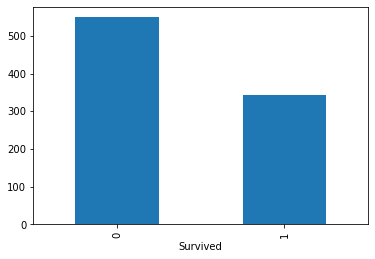

In [4]:
# Afficher ici la répartition de la cible (bar)
dataset.groupby("Survived")\
    .size()\
    .plot(kind="bar")

In [5]:
features = ["Pclass","Sex","Age","SibSp", "Parch","Fare"]

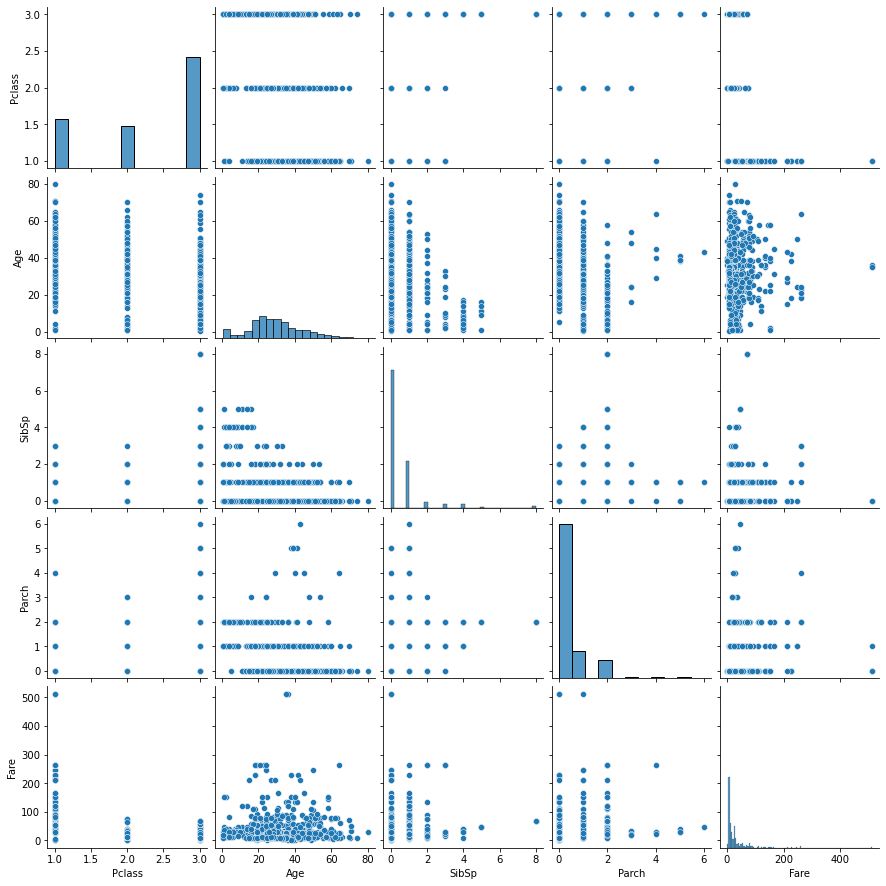

In [6]:
import seaborn as sns

sns.pairplot(dataset[features])

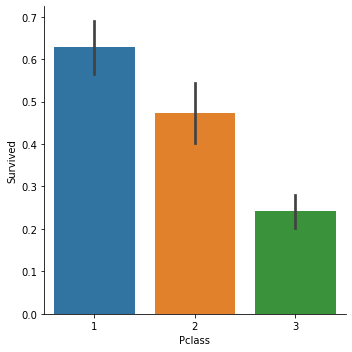

In [7]:
# Here plot relations between categorical feature and target
sns.catplot(x="Pclass", y="Survived", kind="bar", data=dataset)

In [16]:
features = ["Pclass","Sex","Age","SibSp", "Parch","Fare"]
X = X[features].copy() # copy here to not have a slice and suppress warning
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000
888,1,0,19.0,0,0,30.0000
889,3,0,28.0,1,2,23.4500


In [17]:
age_median = dataset.Age.median()
age_median

28.0

In [18]:
X.Age = dataset.Age.fillna(age_median)
X.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
def transform_to_binary(val):
    if(val == "male"):
        return 1
    return 0

X.Sex = dataset.Sex.apply(transform_to_binary)
#dataset[features]
X = X[features].copy()
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000
888,1,0,19.0,0,0,30.0000
889,3,0,28.0,1,2,23.4500


In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(max_depth=5)

In [22]:
%time model.fit(X, y)

CPU times: total: 0 ns
Wall time: 13.9 ms


DecisionTreeClassifier(max_depth=5)

In [23]:
y_pred = model.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

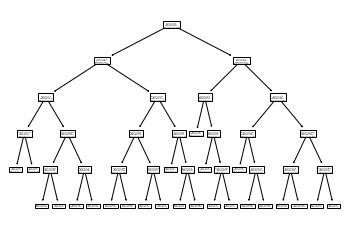

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# WARNING: Do not plot deep tree (5 is deep... but only for plotting)

plot_tree(model)
plt.savefig('out.pdf')

In [25]:
y_true = y.values

In [26]:
# Here compute true positif, false positif, false negative
TP = ((y_pred == 1) & (y_pred == y_true)).sum()
FP = ((y_pred == 1) & (y_pred != y_true)).sum()
FN = ((y_pred == 0) & (y_pred != y_true)).sum()


In [27]:
# Then compute precision, recall and accuracy
precision = TP / (TP + FP)
recall = TP / y_true.sum()
accuracy = (y_pred == y_true).sum() / y_true.shape[0]

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Accuracy: {accuracy * 100:.2f}%")

Precision: 83.17%
Recall: 73.68%
Accuracy: 84.18%


In [28]:
y_pred_proba = model.predict_proba(X)[:,1]
y_pred_proba

array([0.10123457, 1.        , 0.55072464, 1.        , 0.10123457,
       0.10123457, 0.14285714, 0.        , 0.55072464, 1.        ,
       0.55072464, 0.91176471, 0.10123457, 0.10123457, 0.73170732,
       0.91176471, 0.        , 0.10123457, 0.55072464, 0.73170732,
       0.10123457, 0.10123457, 0.55072464, 0.4494382 , 0.55072464,
       0.04347826, 0.10123457, 0.4494382 , 0.73170732, 0.10123457,
       0.4494382 , 1.        , 0.73170732, 0.10123457, 0.4494382 ,
       0.4494382 , 0.10123457, 0.10123457, 0.55072464, 0.55072464,
       0.        , 0.91176471, 0.10123457, 0.93333333, 0.73170732,
       0.10123457, 0.10123457, 0.73170732, 0.10123457, 0.55072464,
       0.33333333, 0.10123457, 1.        , 0.91176471, 0.14285714,
       0.4494382 , 0.91176471, 0.10123457, 0.91176471, 0.33333333,
       0.10123457, 1.        , 0.4494382 , 0.        , 0.4494382 ,
       0.10123457, 0.91176471, 0.10123457, 0.55072464, 0.10123457,
       0.10123457, 0.04347826, 0.        , 0.10123457, 0.71428

In [29]:
from sklearn.metrics import precision_recall_curve

precision, recall, thr = precision_recall_curve(y_true,y_pred_proba)

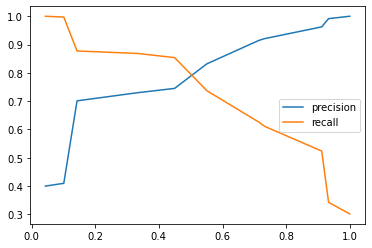

In [30]:
import matplotlib.pyplot as plt 

plt.plot(thr, precision[:-1], label="precision")
plt.plot(thr, recall[:-1], label="recall")
plt.legend()

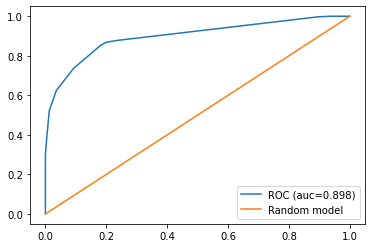

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thr = roc_curve(y_true, y_pred_proba)
auc = roc_auc_score(y_true, y_pred_proba)

plt.plot(fpr, tpr, label=f"ROC (auc={auc:.3f})")
plt.plot([0,1], [0,1], label="Random model")
plt.legend()

In [32]:
# Import model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5)

In [33]:
# Fit the model
%time model.fit(X, y)

CPU times: total: 469 ms
Wall time: 1.3 s


RandomForestClassifier(max_depth=5)

In [34]:
# Get new predictions
y_pred = model.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

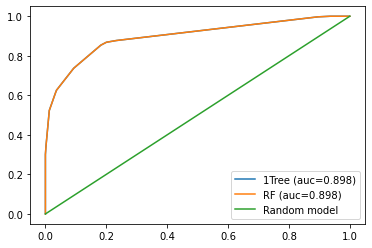

In [35]:
# Compare with RandomForest

fpr2, tpr2, thr2 = roc_curve(y_true, y_pred_proba)
auc2 = roc_auc_score(y_true, y_pred_proba)

plt.plot(fpr, tpr, label=f"1Tree (auc={auc:.3f})")
plt.plot(fpr2, tpr2, label=f"RF (auc={auc2:.3f})")
plt.plot([0,1], [0,1], label="Random model")
plt.legend()